In [17]:
# Import libraries
import requests
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

{
  "class": "driving_license",
  "confidence(%)": 69.2522406578064
}



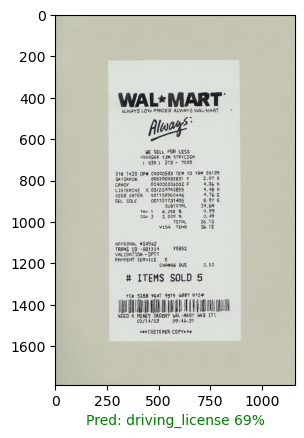

In [24]:
# Api call 

# Choose random image
i = random.randint(101, 151)
extension_list = [".png", ".jpg", ".jpeg"]

url = 'http://0.0.0.0:5000/get-image-class'

for extension in extension_list:
    try:
        files = {'file': open(f'input/Testing_Data/others/{i}{extension}', 'rb')}
        img = mpimg.imread(f'input/Testing_Data/others/{i}{extension}')
    except FileNotFoundError:
        pass
response = requests.post(url, files=files)

plt.imshow(img)

# Change color 
if json.loads(response.text)["confidence(%)"] > 50:
    color = "green"
else:
    color = "red"

# Add xlabel information (prediction/true label)
plt.xlabel("Pred: {} {:2.0f}%".format(json.loads(response.text)["class"],
                                                json.loads(response.text)["confidence(%)"]), color=color)

print(response.text)
